In [43]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [44]:
df = pd.read_csv('listings.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,1489424,"Welcoming, easygoing, comfy bed, entire level",5294164,Efrat,NaN,FOURTEENTH WARD,42.66719,-73.81580,Private room,50.0,1,248,2024-02-27,1.94,1,233,50,NaN
1,2992450,Luxury 2 bedroom apartment,4621559,Kenneth,NaN,THIRD WARD,42.65789,-73.75370,Entire home/apt,70.0,28,9,2022-08-17,0.08,1,21,0,NaN
2,3820211,Restored Precinct in Center Sq. w/Parking,19648678,Terra,NaN,SIXTH WARD,42.65222,-73.76724,Entire home/apt,125.0,2,292,2024-02-18,2.51,4,360,8,NaN
3,5651579,Large studio apt by Capital Center & ESP@,29288920,Gregg,NaN,SECOND WARD,42.64615,-73.75966,Entire home/apt,105.0,7,337,2024-03-07,3.13,2,79,31,NaN
4,6623339,Center Sq. Loft in Converted Precinct w/ Parking,19648678,Terra,NaN,SIXTH WARD,42.65222,-73.76724,Entire home/apt,126.0,2,306,2023-12-26,2.87,4,0,5,NaN


In [45]:
df.shape

(404, 18)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              404 non-null    int64  
 1   name                            404 non-null    object 
 2   host_id                         404 non-null    int64  
 3   host_name                       404 non-null    object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   404 non-null    object 
 6   latitude                        404 non-null    float64
 7   longitude                       404 non-null    float64
 8   room_type                       404 non-null    object 
 9   price                           350 non-null    float64
 10  minimum_nights                  404 non-null    int64  
 11  number_of_reviews               404 non-null    int64  
 12  last_review                     362 

In [47]:
df.isnull().sum()

id                                  0
name                                0
host_id                             0
host_name                           0
neighbourhood_group               404
neighbourhood                       0
latitude                            0
longitude                           0
room_type                           0
price                              54
minimum_nights                      0
number_of_reviews                   0
last_review                        42
reviews_per_month                  42
calculated_host_listings_count      0
availability_365                    0
number_of_reviews_ltm               0
license                           404
dtype: int64

In [48]:
df.describe()

,id,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
count,4.040000e+02,4.040000e+02,0.0,404.000000,404.000000,350.000000,404.000000,404.000000,362.000000,404.000000,404.000000,404.000000,0.0
mean,5.075502e+17,2.215851e+08,NaN,42.657382,-73.776875,114.882857,5.222772,54.732673,1.992403,5.133663,202.027228,16.022277,NaN
std,4.254315e+17,1.796507e+08,NaN,0.009623,0.019607,108.416846,21.515183,98.541437,1.957821,5.436021,131.345837,21.572016,NaN
min,1.489424e+06,6.490680e+05,NaN,42.630660,-73.876489,24.000000,1.000000,0.000000,0.050000,1.000000,0.000000,0.000000,NaN
25%,4.662195e+07,4.762598e+07,NaN,42.651845,-73.790344,75.000000,1.000000,4.000000,0.510000,1.000000,79.000000,1.000000,NaN
50%,6.686083e+17,1.870609e+08,NaN,42.657168,-73.773448,100.000000,2.000000,16.000000,1.370000,3.000000,244.000000,7.000000,NaN
75%,9.022064e+17,3.872668e+08,NaN,42.662161,-73.761915,125.000000,3.000000,61.000000,2.760000,6.500000,327.250000,22.000000,NaN
max,1.104977e+18,5.531120e+08,NaN,42.714896,-73.738103,1750.000000,365.000000,777.000000,11.080000,22.000000,365.000000,131.000000,NaN


## Data Cleaning

### Remove columns that have all values as null

In [49]:
df.drop(['neighbourhood_group', 'license'], axis=1, inplace=True)
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,4.040000e+02,4.040000e+02,404.000000,404.000000,350.000000,404.000000,404.000000,362.000000,404.000000,404.000000,404.000000
mean,5.075502e+17,2.215851e+08,42.657382,-73.776875,114.882857,5.222772,54.732673,1.992403,5.133663,202.027228,16.022277
std,4.254315e+17,1.796507e+08,0.009623,0.019607,108.416846,21.515183,98.541437,1.957821,5.436021,131.345837,21.572016
min,1.489424e+06,6.490680e+05,42.630660,-73.876489,24.000000,1.000000,0.000000,0.050000,1.000000,0.000000,0.000000
25%,4.662195e+07,4.762598e+07,42.651845,-73.790344,75.000000,1.000000,4.000000,0.510000,1.000000,79.000000,1.000000
50%,6.686083e+17,1.870609e+08,42.657168,-73.773448,100.000000,2.000000,16.000000,1.370000,3.000000,244.000000,7.000000
75%,9.022064e+17,3.872668e+08,42.662161,-73.761915,125.000000,3.000000,61.000000,2.760000,6.500000,327.250000,22.000000
max,1.104977e+18,5.531120e+08,42.714896,-73.738103,1750.000000,365.000000,777.000000,11.080000,22.000000,365.000000,131.000000


### Remove rows that have null values for 'last review' and 'price' columns

In [50]:
df.dropna(subset= ['last_review', 'price'],inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 325 entries, 0 to 403
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              325 non-null    int64  
 1   name                            325 non-null    object 
 2   host_id                         325 non-null    int64  
 3   host_name                       325 non-null    object 
 4   neighbourhood                   325 non-null    object 
 5   latitude                        325 non-null    float64
 6   longitude                       325 non-null    float64
 7   room_type                       325 non-null    object 
 8   price                           325 non-null    float64
 9   minimum_nights                  325 non-null    int64  
 10  number_of_reviews               325 non-null    int64  
 11  last_review                     325 non-null    object 
 12  reviews_per_month               325 non-n

In [51]:
df.fillna({'reviews_per_month':0}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 325 entries, 0 to 403
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              325 non-null    int64  
 1   name                            325 non-null    object 
 2   host_id                         325 non-null    int64  
 3   host_name                       325 non-null    object 
 4   neighbourhood                   325 non-null    object 
 5   latitude                        325 non-null    float64
 6   longitude                       325 non-null    float64
 7   room_type                       325 non-null    object 
 8   price                           325 non-null    float64
 9   minimum_nights                  325 non-null    int64  
 10  number_of_reviews               325 non-null    int64  
 11  last_review                     325 non-null    object 
 12  reviews_per_month               325 non-n

### Convert 'last review' column to datatime datatype to facillitate data analysis

In [52]:
df['last_review'] = pd.to_datetime(df['last_review'])

### Review the data info and the first 5 rows

In [53]:

print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 325 entries, 0 to 403
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              325 non-null    int64         
 1   name                            325 non-null    object        
 2   host_id                         325 non-null    int64         
 3   host_name                       325 non-null    object        
 4   neighbourhood                   325 non-null    object        
 5   latitude                        325 non-null    float64       
 6   longitude                       325 non-null    float64       
 7   room_type                       325 non-null    object        
 8   price                           325 non-null    float64       
 9   minimum_nights                  325 non-null    int64         
 10  number_of_reviews               325 non-null    int64         
 11  last_review

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,1489424,"Welcoming, easygoing, comfy bed, entire level",5294164,Efrat,FOURTEENTH WARD,42.66719,-73.81580,Private room,50.0,1,248,2024-02-27,1.94,1,233,50
1,2992450,Luxury 2 bedroom apartment,4621559,Kenneth,THIRD WARD,42.65789,-73.75370,Entire home/apt,70.0,28,9,2022-08-17,0.08,1,21,0
2,3820211,Restored Precinct in Center Sq. w/Parking,19648678,Terra,SIXTH WARD,42.65222,-73.76724,Entire home/apt,125.0,2,292,2024-02-18,2.51,4,360,8
3,5651579,Large studio apt by Capital Center & ESP@,29288920,Gregg,SECOND WARD,42.64615,-73.75966,Entire home/apt,105.0,7,337,2024-03-07,3.13,2,79,31
4,6623339,Center Sq. Loft in Converted Precinct w/ Parking,19648678,Terra,SIXTH WARD,42.65222,-73.76724,Entire home/apt,126.0,2,306,2023-12-26,2.87,4,0,5


Investigate how many values we have in the listing count column

In [54]:
df['calculated_host_listings_count'].value_counts()

calculated_host_listings_count
1     93
2     44
3     37
4     30
6     24
8     20
22    18
9     16
15    15
5     13
10     9
12     6
Name: count, dtype: int64

Inspect the correlation between the columns

<Axes: >

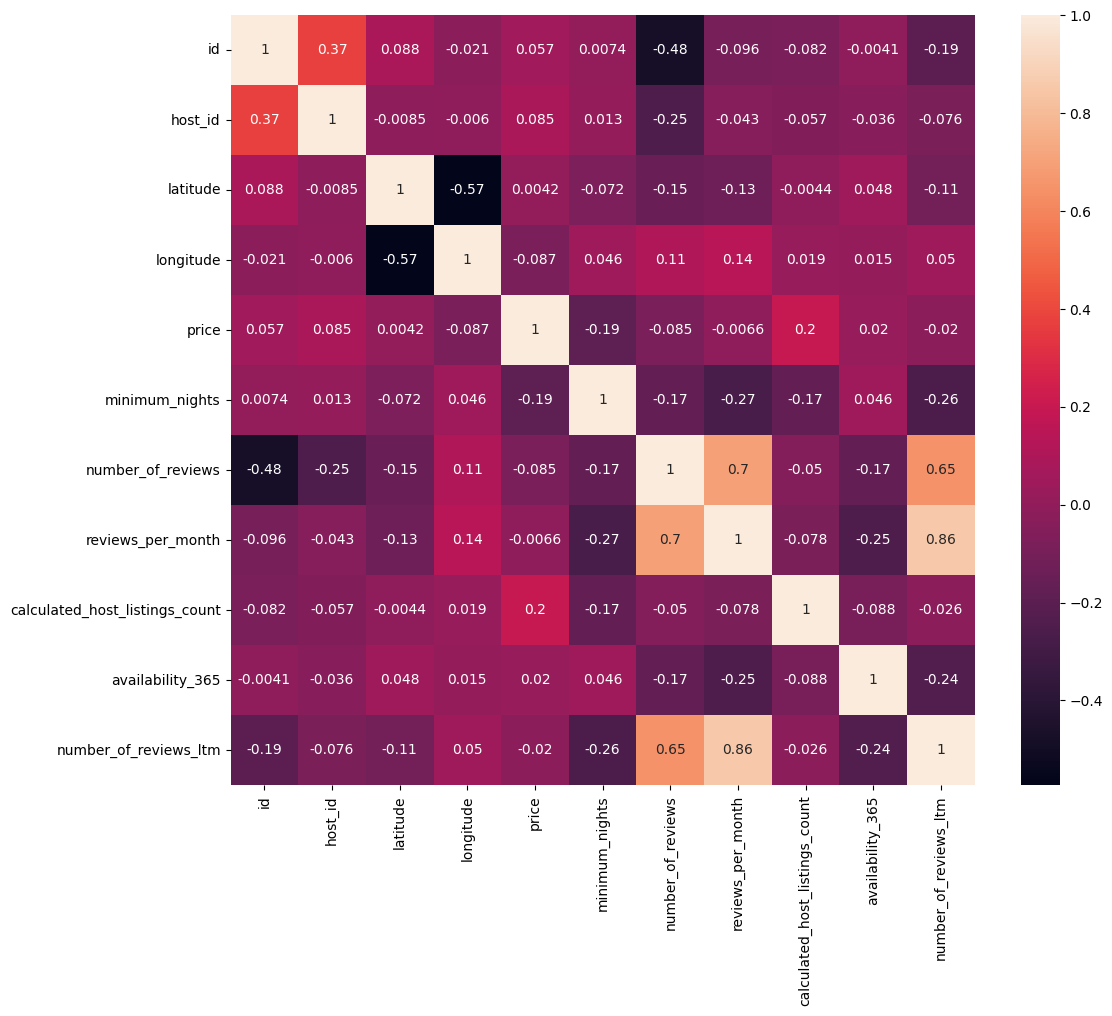

In [55]:
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 10))
sns.heatmap(numeric_df.corr(), annot=True)

### We can conclude from this heatmap the relationship the price have with the host listsings count.

but we have to make sure that there are no outliers or inconsistencies with the data

## Analyzing the Price feature

In [56]:
df['price'].describe()

count    325.000000
mean     110.966154
std       65.041739
min       26.000000
25%       75.000000
50%      100.000000
75%      125.000000
max      628.000000
Name: price, dtype: float64

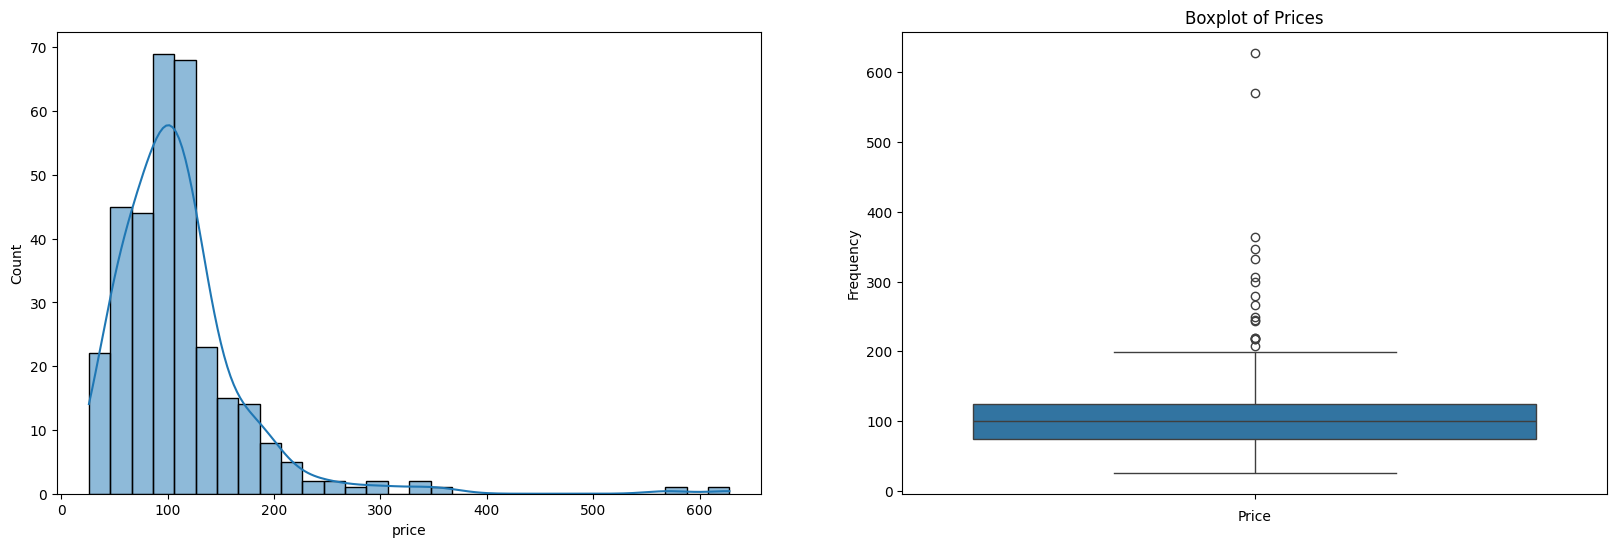

In [58]:
_, axes = plt.subplots(1,2 , figsize=(20, 6))

sns.histplot(df['price'], bins=30, kde=True, ax=axes[0])
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')

sns.boxplot(df['price'], ax=axes[1])
plt.title('Boxplot of Prices')
plt.xlabel('Price')


plt.show()


### Remove outliers from 'Price' colummn

In [59]:
df.drop(df[df['price'] > 380].index, inplace=True)

In [60]:
df['price'].describe()

count    323.000000
mean     107.944272
std       52.563862
min       26.000000
25%       75.000000
50%      100.000000
75%      125.000000
max      364.000000
Name: price, dtype: float64

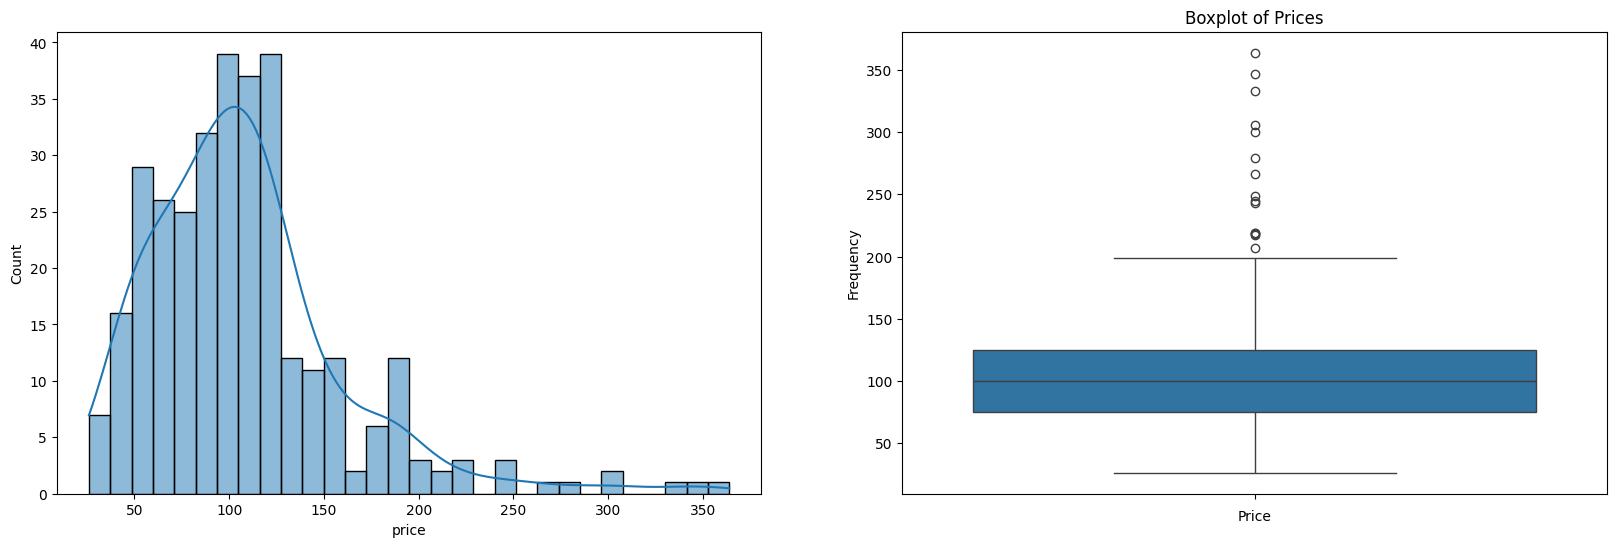

In [61]:
_, axes = plt.subplots(1, 2, figsize=(20, 6))

sns.histplot(df['price'], bins=30, kde=True, ax=axes[0])
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')

sns.boxplot(df['price'], ax=axes[1])
plt.title('Boxplot of Prices')
plt.xlabel('Price')

plt.show()

The distribution of prices is right-skewed, indicating that the majority of listings have lower prices, with a few outliers having higher prices.
We also conclude from the boxplot that 25% of the prices is below 75, 50% is below 100, and 75% is below 125.

In [62]:
df.groupby('room_type').size().sort_values(ascending=False)

room_type
Entire home/apt    226
Private room        96
Shared room          1
dtype: int64

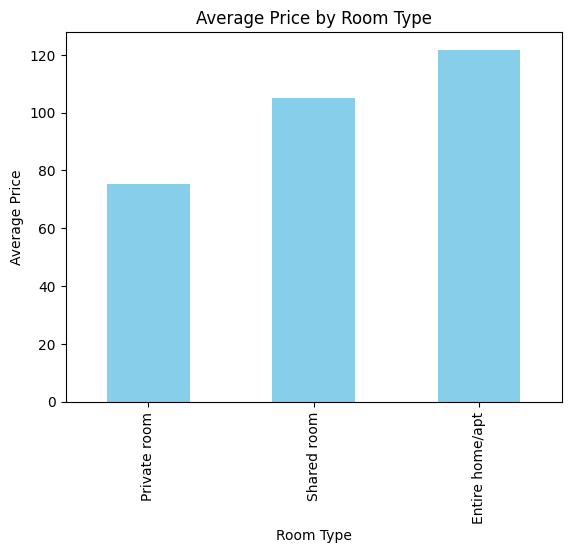

In [63]:
avg_price_by_room_type = df.groupby('room_type')['price'].mean().sort_values()

avg_price_by_room_type.plot(kind='bar', color='skyblue')
plt.title('Average Price by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Average Price')
plt.show()

We conclude that customers are willing to pay more for the privacy and exclusivity of having an entire home or apartment.

In [64]:
df.groupby('neighbourhood').size().sort_values(ascending=False)

neighbourhood
SIXTH WARD         71
SECOND WARD        41
FOURTEENTH WARD    29
NINTH WARD         29
THIRTEENTH WARD    28
TENTH WARD         27
THIRD WARD         26
ELEVENTH WARD      16
FIFTEENTH WARD     15
SEVENTH WARD       14
FOURTH WARD        10
FIFTH WARD          6
EIGHTH WARD         4
FIRST WARD          4
TWELFTH WARD        3
dtype: int64

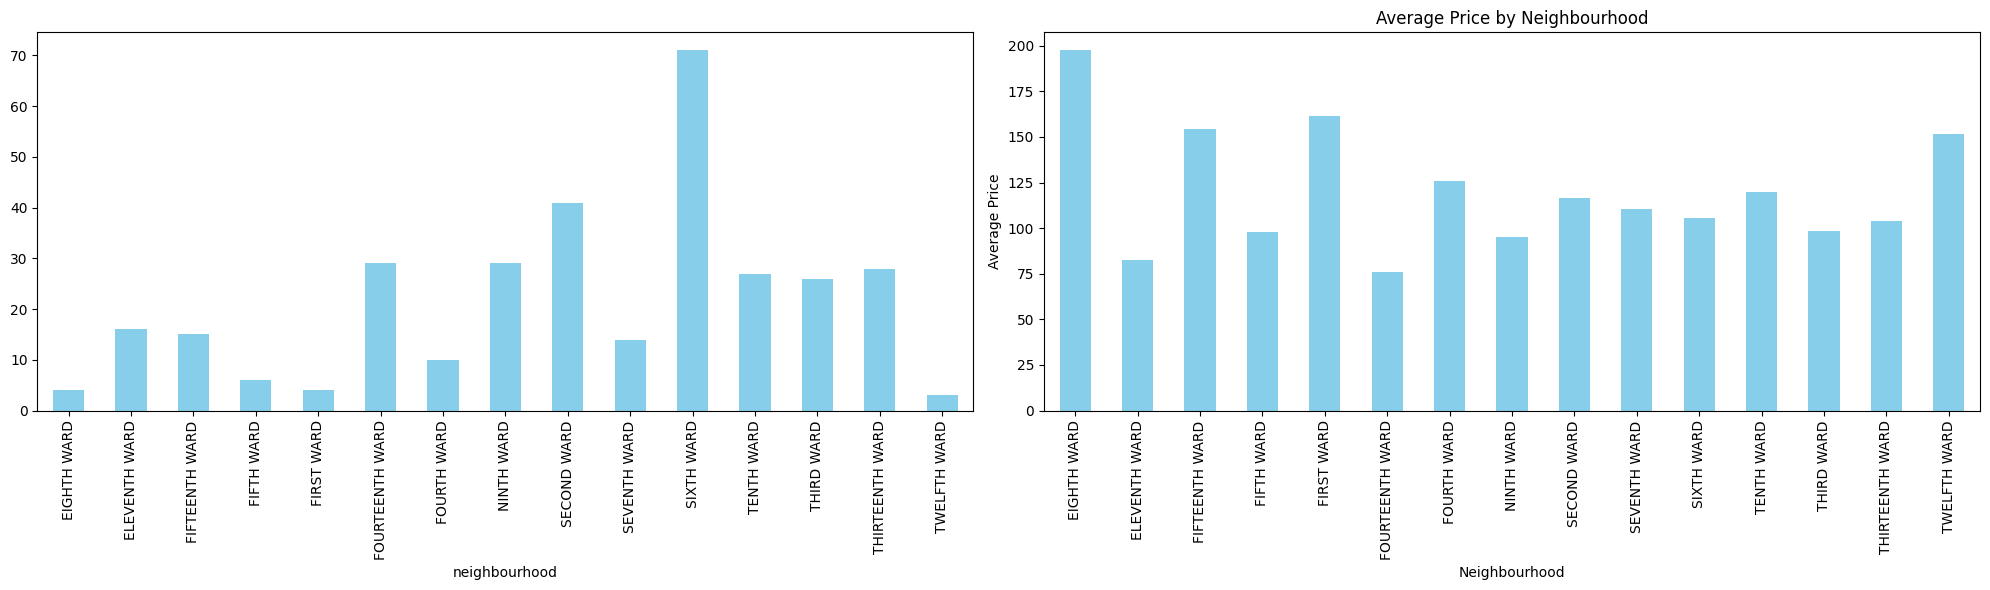

In [71]:
avg_price_by_room_type = df.groupby('neighbourhood')['price'].mean()
count_by_neighbourhood = df.groupby('neighbourhood').size()
_, axes = plt.subplots(1, 2, figsize=(20, 6))

count_by_neighbourhood.plot(kind='bar', color='skyblue', ax=axes[0])
plt.title('Listing Count by Neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('Listing Count')

avg_price_by_room_type.plot(kind='bar', color='skyblue', ax=axes[1])
plt.title('Average Price by Neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('Average Price')

plt.tight_layout()
plt.show()

The comparison of average prices and availability across selected neighborhoods shows that some neighborhoods may stand out with higher or lower average prices.

## Analyzing the availability feature

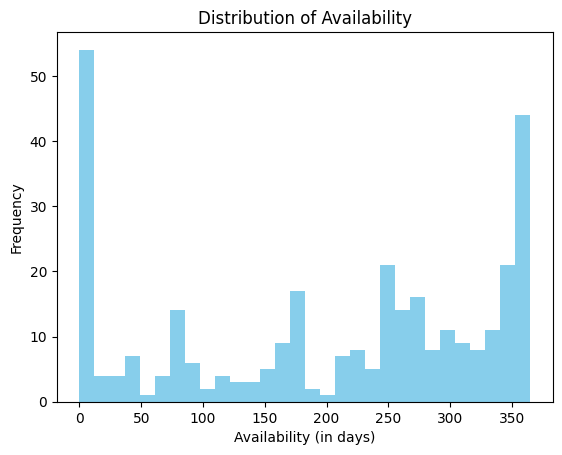

Average Availability: 202.13931888544892 days
Maximum Availability: 365 days
Minimum Availability: 0 days


In [66]:
# Plot the distribution of availability
plt.hist(df['availability_365'], bins=30, color='skyblue')
plt.title('Distribution of Availability')
plt.xlabel('Availability (in days)')
plt.ylabel('Frequency')
plt.show()

# Calculate the average availability
avg_availability = df['availability_365'].mean()
print(f"Average Availability: {avg_availability} days")

# Calculate the maximum availability
max_availability = df['availability_365'].max()
print(f"Maximum Availability: {max_availability} days")

# Calculate the minimum availability
min_availability = df['availability_365'].min()
print(f"Minimum Availability: {min_availability} days")


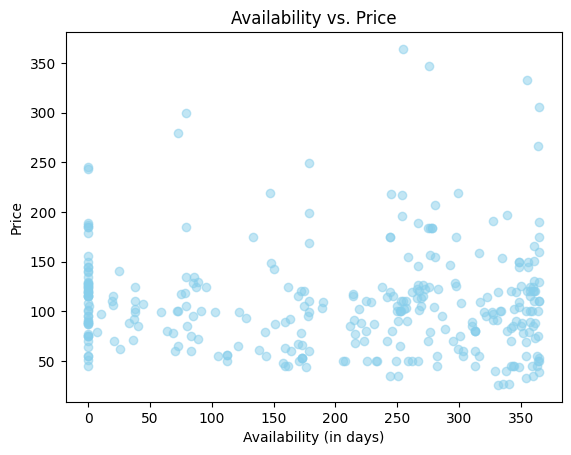

In [67]:
plt.scatter(df['availability_365'], df['price'], alpha=0.5, color='skyblue')
plt.title('Availability vs. Price')
plt.xlabel('Availability (in days)')
plt.ylabel('Price')
plt.show()


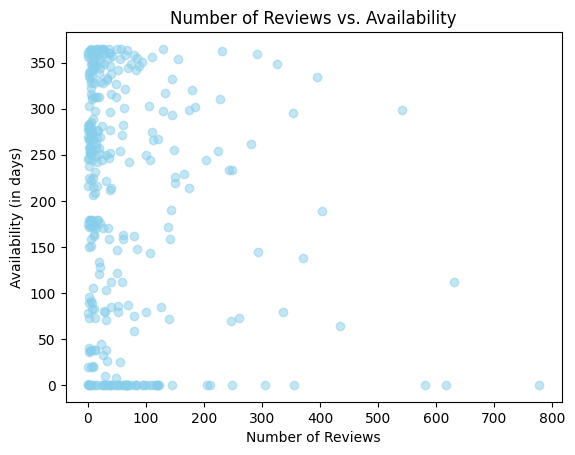

In [68]:
plt.scatter(df['number_of_reviews'], df['availability_365'], alpha=0.5, color='skyblue')
plt.title('Number of Reviews vs. Availability')
plt.xlabel('Number of Reviews')
plt.ylabel('Availability (in days)')
plt.show()

We can conclude that there is no strong correlation between the number of reviews and the availability of listings.

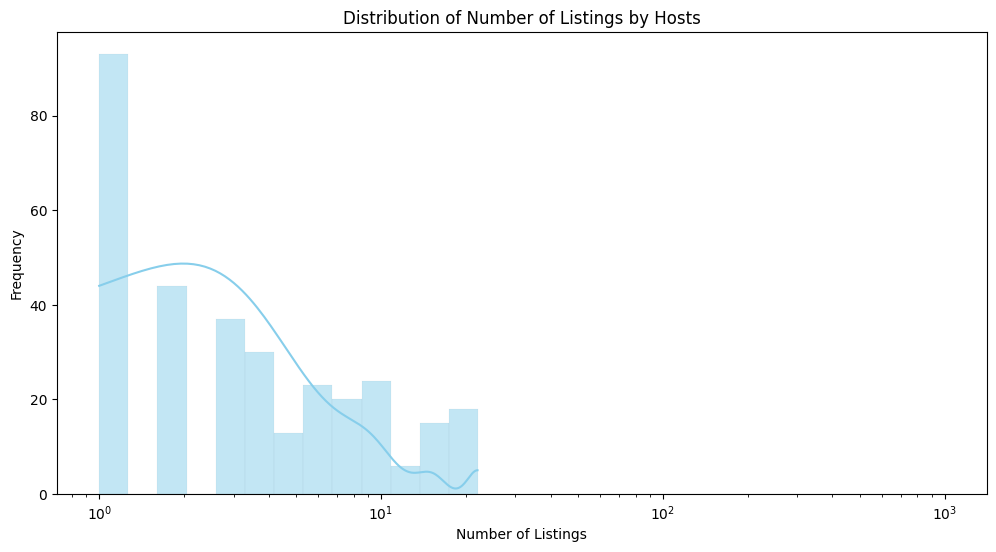

In [69]:
plt.figure(figsize=(12, 6))
sns.histplot(df['calculated_host_listings_count'], bins=np.logspace(0, 3, 30), kde=True, color='skyblue')
plt.xscale('log')  # Use a logarithmic scale on the x-axis
plt.title('Distribution of Number of Listings by Hosts')
plt.xlabel('Number of Listings')
plt.ylabel('Frequency')
plt.show()

The graph showsthat a significant number of hosts have a low number of listings, indicating that the platform has a diverse range of hosts, including occasional hosts with only a few listings.

<Figure size 1200x800 with 0 Axes>

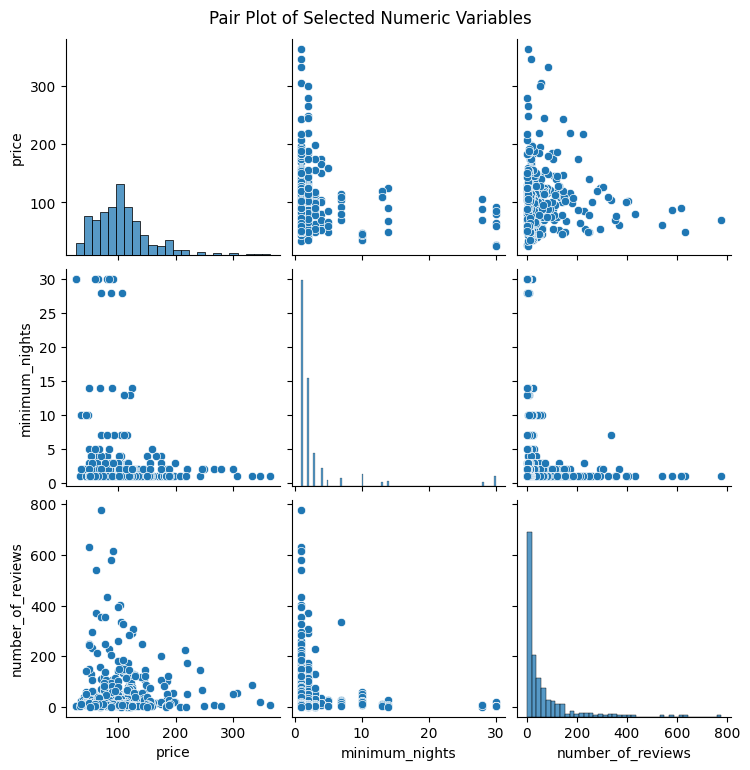

In [73]:
selected_numeric_columns = ['price', 'minimum_nights', 'number_of_reviews']

plt.figure(figsize=(12, 8))
sns.pairplot(df[selected_numeric_columns])
plt.suptitle('Pair Plot of Selected Numeric Variables', y=1.02)
plt.show()

We can conclude from this plot that the more we go around the average price, the more reviews we have. Also, the less number of nights, the more reviews.

# Business Plan based on analysis

The pricing strategy should be dynamic, maybe adjusted based on neighborhood popularity. \
More focus on Entire apartements and Private rooms as the customers prefer them more that the shared room.\
Encourage the customers to write more reviews as it appears to significantly impact the availability of the listing.